# NETFLIX DATA ANALYSIS WITH INTERESTING VISUALIZATIONS
Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This raw data is Web Scrapped through Selenium. It contains Unlabelled text data of around 9000 Netflix Shows and Movies along with Full details like Cast, Release Year, Rating, Description, directors, duration e.t.c

In this work, I will do an exploratory data analysis for the Netflix Dataset. The main goal of this work is to visualize interesting statistical data that could help netflix in deciding the type of shows/movies to produce.I will be using tools and techniques learnt from the course Data Analysis with Python: Zero to Pandas

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

# Downloading the Dataset
I will be downloading my csv format dataset from https://jovian.ai/outlinkurl=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%3FfileType%3Dcsv

In [2]:
netflix =pd.read_csv("netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# QUESTIONS
#TOP 5 YEARS MORE CONTENT WAS ADDED

#CONTENT VIEWERS BASED OF TYPE

#WHAT ARE THE TOP 5  DIRECTORS

#WHAT ARE THE BOTTOM 5 DIRECTORS

#WHICH COUNTTRY HAS THE MOST NETFLIX

#WHAT IS THE HIGHEST RATING

#WHICH CONTENT HAS BOTH WILL SMITH AND EVA MENDES IN IT'S CAST?

#In how many movies/shows, Tom Cruise was cast ?

# Data Preparation and Cleaning

Loading the dataset using pandas

In [3]:
netflix.shape

(8807, 12)

In [4]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
netflix.drop(columns = "description", inplace= True)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [7]:
#convert release_year to date time
netflix["release_year"]= pd.to_datetime(netflix["release_year"]).dt.year

In [8]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [9]:
#date_added to date time
netflix["date_added"]= pd.to_datetime(netflix["date_added"])

In [10]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 757.0+ KB


In [11]:
#to get the statistical representation of the data set
netflix.describe()

,release_year
count,8807.0
mean,1970.0
std,0.0
min,1970.0
25%,1970.0
50%,1970.0
75%,1970.0
max,1970.0


In [12]:
#treating the null values
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [13]:
#TO GET THE PERCENTAGE OF NULL VALUES IN EACH COLUMN
for i in netflix.columns:
    rate = netflix[i].isna().sum()/len(netflix) * 100
    if rate > 0:
        print("The null values in {} is {}%".format(i, round(rate,2)))

The null values in director is 29.91%
The null values in cast is 9.37%
The null values in country is 9.44%
The null values in date_added is 0.11%
The null values in rating is 0.05%
The null values in duration is 0.03%


In [14]:
#fill the null values in director with no director
netflix["director"]= netflix["director"].fillna("No Director")

In [15]:
#fill the cast with na
netflix["cast"]= netflix["cast"].fillna("NA")

In [16]:
#fill the country with the most popular country
netflix["country"].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [17]:
netflix["country"]= netflix["country"].fillna("United States")

In [18]:
#fill date_added, rating, duration with mode of each column
netflix["date_added"]= netflix["date_added"].fillna(netflix["date_added"].mode()[0])

In [19]:
netflix["rating"]= netflix["rating"].fillna(netflix["rating"].mode()[0])

In [20]:
netflix["duration"]= netflix["duration"].fillna(netflix["duration"].mode()[0])

In [21]:
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [22]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,1970,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,1970,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,No Director,NA,United States,2021-09-24,1970,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


# TOP 5 YEARS BASED ON CONTENT ADDED

In [23]:
year_added= netflix["date_added"].dt.year
year_added

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: date_added, Length: 8807, dtype: int64

In [24]:
year_added= year_added.to_frame()
year_added

,date_added
0,2021
1,2021
2,2021
3,2021
4,2021
...,...
8802,2019
8803,2019
8804,2019
8805,2020


In [25]:
year_added.rename(columns={"date_added": "year_added"},inplace= True)

In [26]:
netflix= pd.concat([netflix, year_added], axis = 1)

In [27]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,1970,PG-13,90 min,Documentaries,2021
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,1970,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
3,s4,TV Show,Jailbirds New Orleans,No Director,NA,United States,2021-09-24,1970,TV-MA,1 Season,"Docuseries, Reality TV",2021
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021


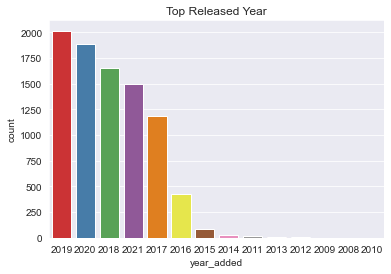

In [28]:
plt.title("Top Released Year")
sns.countplot(x= netflix["year_added"], order= netflix["year_added"].value_counts().index, palette= "Set1");

Netflix release more content between the year 2017 and 2019

# VIEWERS CONTENT BASED ON TYPE

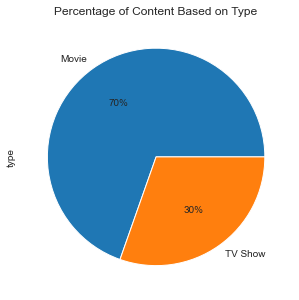

In [29]:
plt.figure(figsize=(10,5))
plt.title("Percentage of Content Based on Type")
netflix["type"].value_counts().plot(kind= "pie", autopct= "%1.0f%%");

A larger percentage of 70% of Netflix content is Movie Type while 30% are TV shows

# TOP 5  DIRECTORS

In [30]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,1970,PG-13,90 min,Documentaries,2021
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,1970,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
3,s4,TV Show,Jailbirds New Orleans,No Director,NA,United States,2021-09-24,1970,TV-MA,1 Season,"Docuseries, Reality TV",2021
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021


In [31]:
directors= netflix["director"].str.split(",", expand = True).stack()
directors

0     0    Kirsten Johnson
1     0        No Director
2     0    Julien Leclercq
3     0        No Director
4     0        No Director
                ...       
8802  0      David Fincher
8803  0        No Director
8804  0    Ruben Fleischer
8805  0       Peter Hewitt
8806  0        Mozez Singh
Length: 9612, dtype: object

In [32]:
directors.value_counts()#before splitting

No Director         2634
Rajiv Chilaka         22
 Jan Suter            18
Raúl Campos           18
Marcus Raboy          16
                    ... 
Eric Bross             1
Will Eisenberg         1
Marina Seresesky       1
Kenny Leon             1
Mozez Singh            1
Length: 5121, dtype: int64

In [33]:
netflix["director"]

0       Kirsten Johnson
1           No Director
2       Julien Leclercq
3           No Director
4           No Director
             ...       
8802      David Fincher
8803        No Director
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [34]:
directors= directors.to_frame()
directors.rename(columns= {0: "director"}, inplace= True)
directors

,,director
0,0,Kirsten Johnson
1,0,No Director
2,0,Julien Leclercq
3,0,No Director
4,0,No Director
...,...,...
8802,0,David Fincher
8803,0,No Director
8804,0,Ruben Fleischer
8805,0,Peter Hewitt


In [35]:
directors["director"].unique()

array(['Kirsten Johnson', 'No Director', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [36]:
dir= directors.value_counts().reset_index(name= "content")
dir

,director,content
0,No Director,2634
1,Rajiv Chilaka,22
2,Raúl Campos,18
3,Jan Suter,18
4,Suhas Kadav,16
...,...,...
5116,J. Lee Thompson,1
5117,J. Michael Long,1
5118,Songyos Sugmakanan,1
5119,Smriti Keshari,1


In [37]:
dir_new= dir[dir["director"]!= "No Director"]
dir_top= dir_new.head(10)

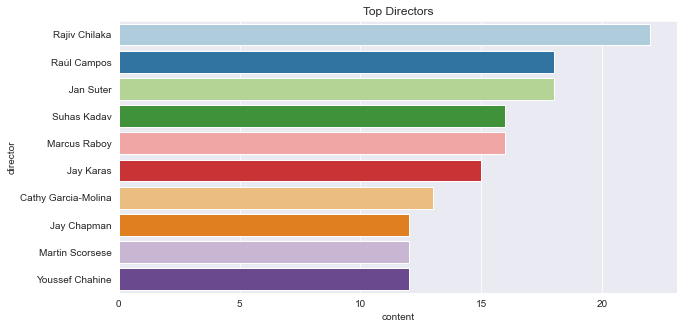

In [38]:
plt.figure(figsize= (10,5))
plt.title("Top Directors")
sns.barplot(x= dir_top["content"], y= dir_top["director"], palette= "Paired");

# BOTTOM 5 DIRECTORS

In [39]:
dir_bottom= dir_new.tail(10)
dir_bottom

,director,content
5111,Izidore K. Musallam,1
5112,Izu Ojukwu,1
5113,Iñaki Dorronsoro,1
5114,J Blakeson,1
5115,J. Davis,1
5116,J. Lee Thompson,1
5117,J. Michael Long,1
5118,Songyos Sugmakanan,1
5119,Smriti Keshari,1
5120,Joaquín Mazón,1


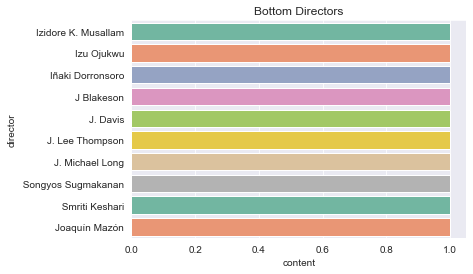

In [40]:
plt.title("Bottom Directors")
sns.barplot(x= dir_bottom["content"], y= dir_bottom["director"], palette= "Set2");

# WHICH COUNTRY HAS THE MOST NETFLIX

In [41]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,1970,PG-13,90 min,Documentaries,2021
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,1970,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
3,s4,TV Show,Jailbirds New Orleans,No Director,NA,United States,2021-09-24,1970,TV-MA,1 Season,"Docuseries, Reality TV",2021
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021


In [42]:
netflix_country1= netflix["country"].str.split(", ", expand= True).stack()
netflix_country1

0     0    United States
1     0     South Africa
2     0    United States
3     0    United States
4     0            India
               ...      
8802  0    United States
8803  0    United States
8804  0    United States
8805  0    United States
8806  0            India
Length: 10845, dtype: object

In [43]:
netflix_country= netflix_country1.to_frame()
netflix_country

,,0
0,0,United States
1,0,South Africa
2,0,United States
3,0,United States
4,0,India
...,...,...
8802,0,United States
8803,0,United States
8804,0,United States
8805,0,United States


In [44]:
netflix_country.rename(columns= {0: "country"}, inplace = True)
netflix_count= netflix_country
netflix_count

,,country
0,0,United States
1,0,South Africa
2,0,United States
3,0,United States
4,0,India
...,...,...
8802,0,United States
8803,0,United States
8804,0,United States
8805,0,United States


In [45]:
country =netflix_count.value_counts().reset_index(name= "count")
country

,country,count
0,United States,4520
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
...,...,...
122,Kazakhstan,1
123,Jamaica,1
124,Slovakia,1
125,Somalia,1


In [46]:
top_country= country.head(10)
top_country

,country,count
0,United States,4520
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


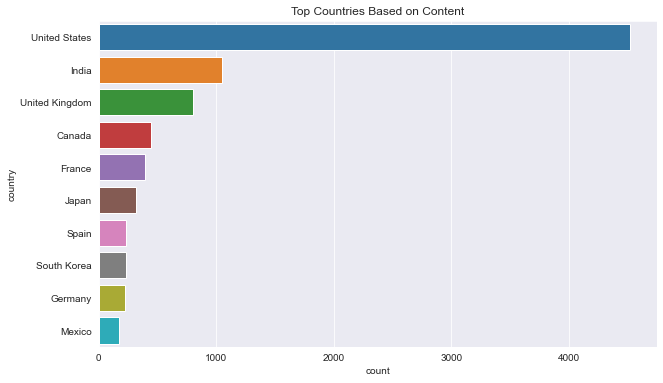

In [47]:
plt.figure(figsize=(10, 6))
plt.title("Top Countries Based on Content")
sns.barplot(x= top_country["count"], y= top_country["country"]);

# WHAT IS THE HIGHEST RATING

In [48]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,1970,PG-13,90 min,Documentaries,2021
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,1970,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
3,s4,TV Show,Jailbirds New Orleans,No Director,NA,United States,2021-09-24,1970,TV-MA,1 Season,"Docuseries, Reality TV",2021
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021


In [49]:
netflix["rating"].value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

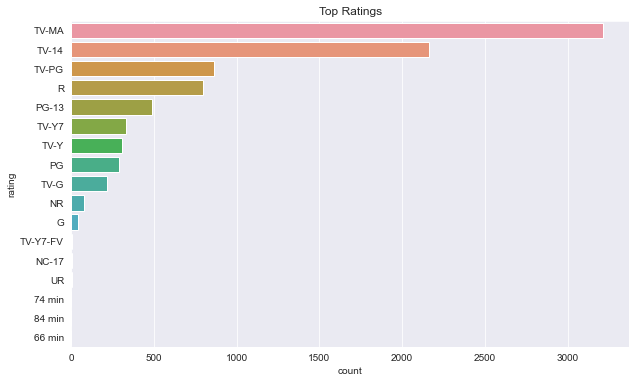

In [50]:
plt.figure(figsize=(10,6))
plt.title("Top Ratings")
sns.countplot(y= netflix["rating"], order= netflix["rating"].value_counts().index);

# Which content has both WILL SMITH AND Eva Mendes in its cast?

In [51]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,1970,PG-13,90 min,Documentaries,2021
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,1970,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
3,s4,TV Show,Jailbirds New Orleans,No Director,NA,United States,2021-09-24,1970,TV-MA,1 Season,"Docuseries, Reality TV",2021
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021


In [52]:
netflix["cast"]

0                                                      NA
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                      NA
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                                   NA
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [53]:
both = netflix["cast"][netflix["cast"].str.contains("Will Smith") & netflix["cast"].str.contains("Eva Mendes")]
both

6977    Will Smith, Eva Mendes, Kevin James, Amber Val...
Name: cast, dtype: object

In [54]:
a= netflix.iloc[6977]
a

show_id                                                     s6978
type                                                        Movie
title                                                       Hitch
director                                             Andy Tennant
cast            Will Smith, Eva Mendes, Kevin James, Amber Val...
country                                             United States
date_added                                    2020-01-01 00:00:00
release_year                                                 1970
rating                                                      PG-13
duration                                                  118 min
listed_in                               Comedies, Romantic Movies
year_added                                                   2020
Name: 6977, dtype: object

In [55]:
a.loc["title"]

'Hitch'

In [56]:
print("The " + a.loc["type"] + " " + a.loc["title"] + " has both Will Smith and Eva Mendes")

The Movie Hitch has both Will Smith and Eva Mendes


# In how many movies/shows, Tom Cruise was cast ?

In [57]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,1970,PG-13,90 min,Documentaries,2021
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,1970,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
3,s4,TV Show,Jailbirds New Orleans,No Director,NA,United States,2021-09-24,1970,TV-MA,1 Season,"Docuseries, Reality TV",2021
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021


In [58]:
tom_cruise= netflix["cast"][netflix["cast"].str.contains("Tom Cruise")]
tom_cruise

341     John C. Reilly, Philip Baker Hall, Tom Cruise,...
1254    Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...
Name: cast, dtype: object

In [59]:
tc= netflix.iloc[[341, 1254]]
tc

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,2021-08-01,1970,R,189 min,"Dramas, Independent Movies",2021
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2021-03-01,1970,R,134 min,"Classic Movies, Dramas",2021


In [60]:
print("Tom Cruise featured in {} movies".format(tc["type"].value_counts().sum()))

Tom Cruise featured in 2 movies


# CONCLUSION
From this analysis, it can be concluded taht:

Number of movies in Netflix is more than Number of TV Shows on Netflix The no of recently released movies are lesser than the the movies released 2 to 3 years ago on Netflix Netflix has the most content from United States There is more content for Mature Audience in Netflix followed by Teens and "Kids with Parental Guidance" in both Movies and TV Shows